# Librerias utilizadas

In [1]:
%pip install wget

Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import wget
import scipy.io.wavfile as wave
import IPython
from scipy.linalg import toeplitz, inv

# 1. Reproducir diferentes excitaciones u<sub>k</sub>(n) con un parlante y medir su respuesta y<sub>k</sub>(n) con un micrófono, con N = 48000 y fs = 48 kHz.

## a. Señal de música

In [3]:
song_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP2/Grabaciones/Entradas/buttercup_1seg.wav?raw=true'
song_file = wget.download(song_url)

In [4]:
fs, song_array = wave.read(str(song_file))
print("fs = "+str(fs))
print("Number of samples = "+ str(len(song_array)))
IPython.display.Audio(song_array,rate=fs)

fs = 48000
Number of samples = 48000


Respuesta medida:

In [5]:
song_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/Buttercup.wav'
song_out_file = wget.download(song_out_url)
fs, song_out_array = wave.read(str(song_out_file))
IPython.display.Audio(song_out_array,rate=fs)

## b. Una señal de voz

In [6]:
voice_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Entradas/Okay_1seg.wav'
voice_file = wget.download(voice_url)

In [7]:
fs, voice_array = wave.read(voice_file)
print("fs = "+str(fs))
print("Number of samples = "+ str(len(voice_array)))
IPython.display.Audio(voice_array,rate=fs)

fs = 48000
Number of samples = 48000


Respuesta medida:

In [8]:
voice_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/okay.wav'
voice_out_file = wget.download(voice_out_url)
fs, voice_out_array = wave.read(str(voice_out_file))
IPython.display.Audio(voice_out_array,rate=fs)

## c. Una señal cuadrada de f<sub>0</sub>=100 Hz

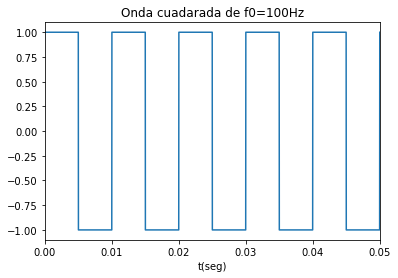

In [9]:
t= np.linspace(start=0,stop=1,num=48000)
f = 100         #Frecuencia fundamental de la onda cuadrada
square_wave = sig.square(2 * np.pi * f * t)
plt.plot(t, square_wave)
plt.title("Onda cuadarada de f0=100Hz")
plt.xlim(left=0,right=0.05)
plt.xlabel("t(seg)")
plt.show()

In [10]:
IPython.display.Audio(square_wave,rate=fs)

Respuesta medida:

In [11]:
square_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/square.wav'
square_out_file = wget.download(square_out_url)
fs, square_out_array = wave.read(str(square_out_file))
IPython.display.Audio(square_out_array,rate=fs)

## d. Un barrido lineal de frecuencia con f<sub>0</sub> = 20 Hz, f<sub>1</sub> = 20 kHz y T = 1 s

In [12]:
t= np.linspace(start=0,stop=1,num=48000)
f1=20e3
f0=20
T=1
K= (f1-f0)/T
x = 2 * np.pi * t * ( f0 + 0.5 * K * t)
lineal_sweep = np.sin(x)

In [13]:
IPython.display.Audio(lineal_sweep,rate=fs)

Respuesta medida:

In [14]:
lineal_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/lineal.wav'
lineal_out_file = wget.download(lineal_out_url)
fs, lineal_out_array = wave.read(str(lineal_out_file))
IPython.display.Audio(lineal_out_array,rate=fs)

## e. Un barrido exponencial de frecuencia con f<sub>0</sub> = 20 Hz, f<sub>1</sub> = 20 kHz y T = 1 s

In [15]:
t= np.linspace(start=0,stop=1,num=48000)
f1=20e3
f0=20
T=1.
K= (f1/f0)**(1./T)
x = 2 * np.pi * f0 * ( ( (K**t)-1 )/math.log(K) )
exp_sweep = np.sin(x)

In [16]:
IPython.display.Audio(exp_sweep,rate=fs)

Respuesta medida:

In [17]:
exp_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/exp.wav'
exp_out_file = wget.download(exp_out_url)
fs, exp_out_array = wave.read(str(exp_out_file))
IPython.display.Audio(exp_out_array,rate=fs)

## f. Ruido blanco guassiano de media cero

In [18]:
noise = np.random.randn(48000)
IPython.display.Audio(noise,rate=fs)

Respuesta medida:

In [19]:
noise_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/noise.wav'
noise_out_file = wget.download(noise_out_url)
fs, noise_out_array = wave.read(str(noise_out_file))
IPython.display.Audio(noise_out_array,rate=fs)

# 2. Estimar el filtro óptimo en cada uno de los casos. Graficar J<sub>min</sub> en función de M, y determinar el valor óptimo de M para cuando no se observe mejora de J<sub>min</sub> con aumento de M. Para ese valor de M, determinar ε y los autovalores de la matriz de autocorrelación. Ordenar los autovalores de mayor a menor, y graficar su distribución.

In [20]:
def r_matrix(vect, M):
    corr = np.correlate(vect,np.conj(vect), mode='full')
    corr_trunc = corr[corr.argmax():corr.argmax()+M] / len(corr)
    r = toeplitz(corr_trunc)
    return r

def get_eigenvalues(u_n, M):
    r = r_matrix(u_n, M)
    ev = np.linalg.eig(r)
    return ev

def wiener_coefs(u_n, d_n, M):
    r = r_matrix(u_n, M)
    r_inv = inv(r)
    p = np.correlate(u_n, np.conj(d_n), mode='full')
    start = len(p)//2
    p_m = np.flip(p[start-M:start] / len(p))

    w_o = np.dot(r_inv, p_m)
    var_d = np.var(d_n)
    var_d_hat = np.matmul(np.conj(p_m),w_o )
    var_d_hat = p_m.dot(w_o)
    Jmin = var_d - var_d_hat
    epsilon = 1 - var_d_hat/(var_d+1e-19)
    return w_o, Jmin, epsilon

def search_opt_M(data, desired, m_jump, th):
    Jmin_s = []
    eps_s = []
    M_s = []
    delta = 1
    last_epsilon = 1
    m = 0
    while delta > th:
        m = m + m_jump
        M_s.append(m)
        print('Starting order ', m)
        w_o, Jmin, epsilon = wiener_coefs(data, desired, m)
        filtered = filterW(data, w_o)
        Jmin_s.append(Jmin)
        eps_s.append(epsilon)
        delta  = abs(last_epsilon-epsilon)/last_epsilon
        last_epsilon = epsilon
    return filtered, Jmin_s, eps_s, M_s
    
        
def filterW(data, w_o):
    samples = len(data)
    M = len(w_o)
    filtered = np.zeros(samples)
    filtered = sig.filtfilt(w_o, [1], data)
    return filtered

def calc_error(filtered, desired):
    var_d = np.var(d_n)
    var_d_hat = np.matmul(np.matmul(p, r_inv), p.reshape((-1, 1)))
    Jmin = var_d - var_d_hat
    eps = 1 - var_d_hat/var_d
    return Jmin, eps

def plot_u_and_d(u,d):
    plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Ampitude')
    plt.xlabel('Samples')
    plt.title('u(n) vs d(n)')
    plt.grid('on')
    plt.plot(u, label='u(n)')
    plt.plot(d, label='d(n)')
    plt.legend(loc='upper center')
    plt.show()

def plot_Jmin_and_eps(M_s, Jmin_s, eps_s):
    plt.figure(num=None, figsize=(15,6), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(121)
    plt.ylabel('Jmin')
    plt.xlabel('M')
    plt.title('Jmin vs M')
    plt.grid('on')
    plt.plot(M_s, Jmin_s, marker='o', linestyle='--', color='r', label='Square')
    plt.subplot(122)
    plt.ylabel('epsilon')
    plt.xlabel('M')
    plt.title('epsilon vs M')
    plt.grid('on')
    plt.plot(M_s, eps_s, marker='o', linestyle='--', color='r', label='Square')
    plt.show()

def plot_ev(ev):
    plt.figure(num=None, figsize=(15,6), dpi=80, facecolor='w', edgecolor='k')
    plt.hist(ev, bins=20)
    plt.title('Eigenvalues Distribution')
    plt.ylabel('Multiplicity')
    plt.xlabel('Eigenvalue')
    plt.grid('on')
    plt.show()

## Voice Signal

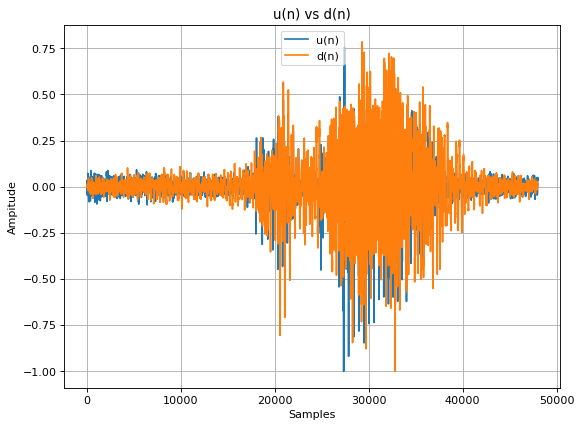

Starting order  500
Starting order  1000
Starting order  1500
Starting order  2000
Starting order  2500
Starting order  3000
Starting order  3500
Starting order  4000
Starting order  4500
Starting order  5000


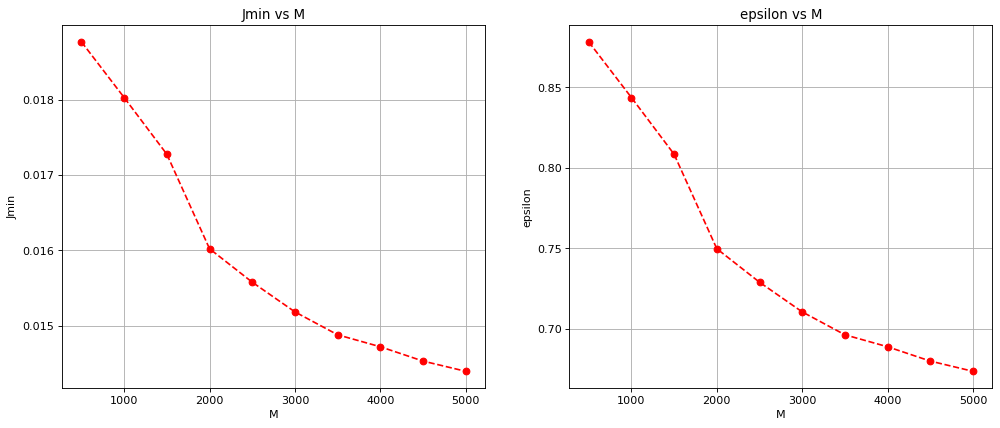

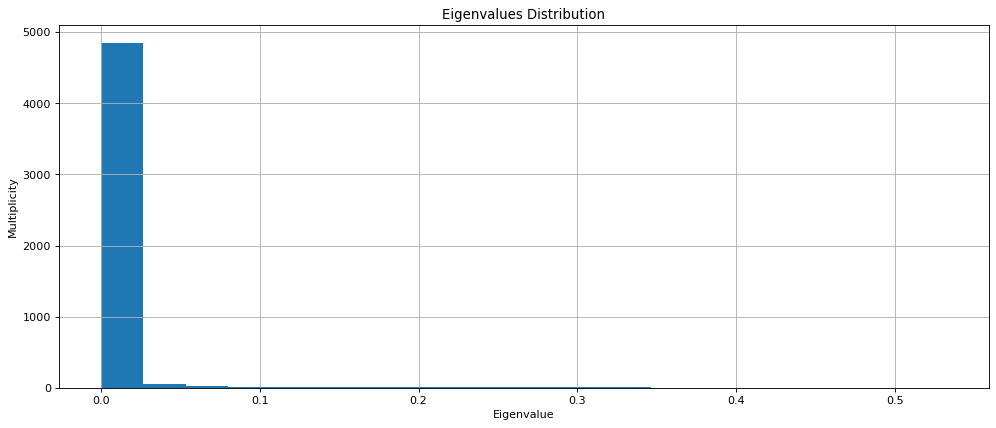

In [21]:
data = voice_array
desired = voice_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s, M_s = search_opt_M(u_n, d_n, m_jump=500, th=0.01)
plot_Jmin_and_eps(M_s, Jmin_s, eps_s)
m_opt = M_s[-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [22]:
IPython.display.Audio(filtered,rate=fs)

## Song Signal

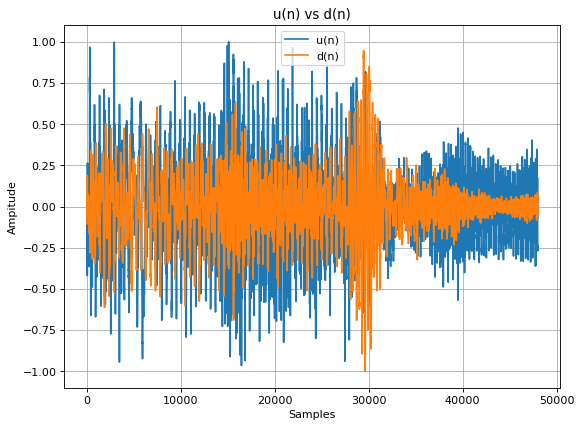

Starting order  500
Starting order  1000
Starting order  1500
Starting order  2000
Starting order  2500
Starting order  3000
Starting order  3500


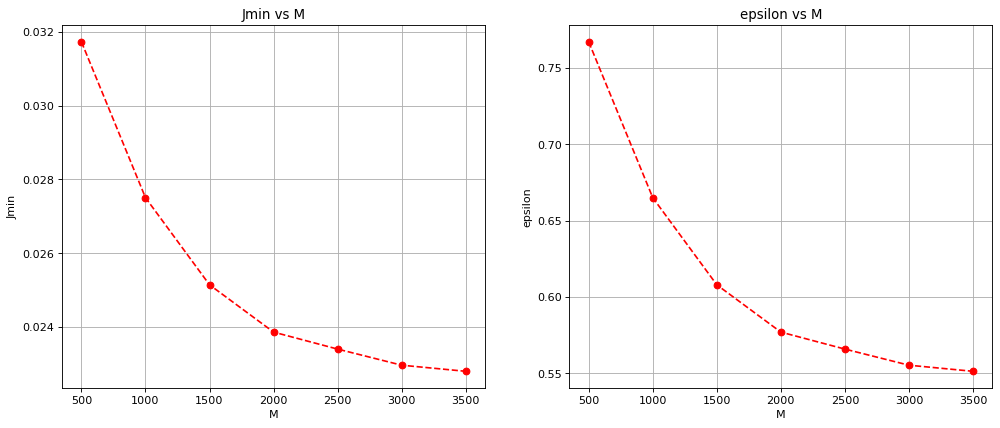

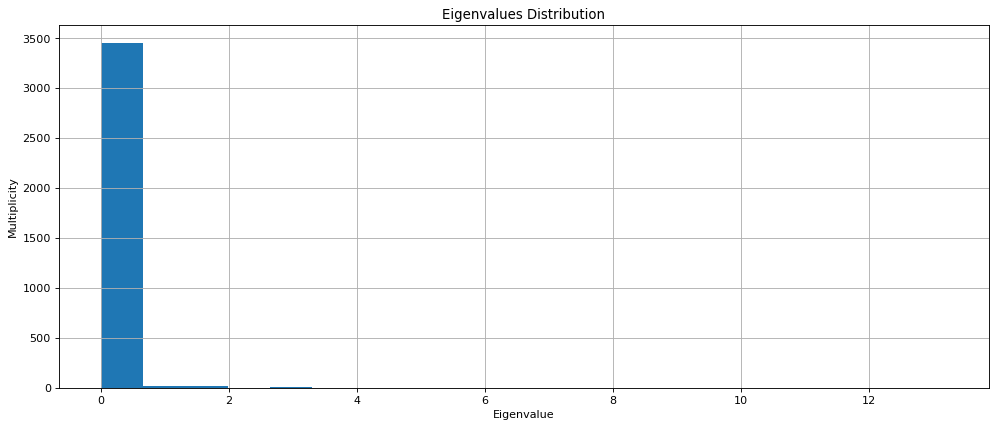

In [23]:
data = song_array
desired = song_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s, M_s = search_opt_M(u_n, d_n, m_jump=500, th=0.01)
plot_Jmin_and_eps(M_s, Jmin_s, eps_s)
m_opt = M_s[-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [24]:
IPython.display.Audio(filtered,rate=fs)

## Square Signal

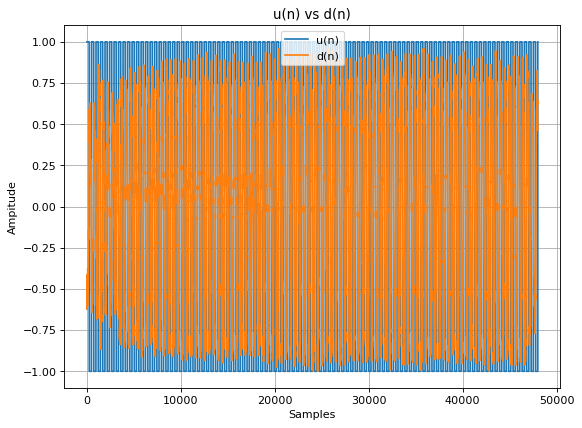

Starting order  500
Starting order  1000


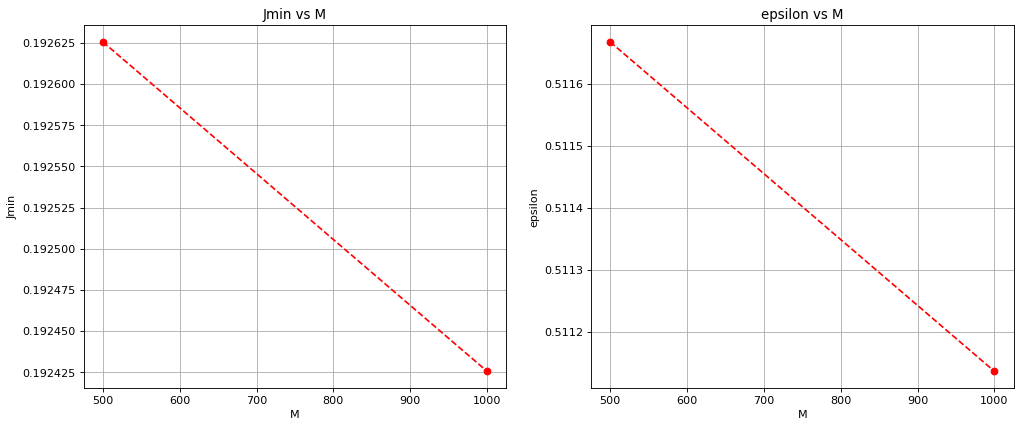

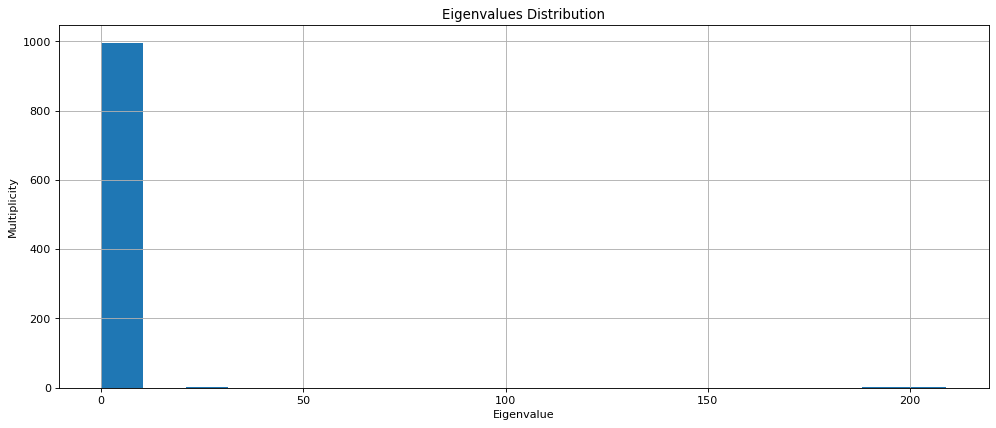

In [25]:
data = square_wave
desired = square_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s, M_s = search_opt_M(u_n, d_n, m_jump=500, th=0.01)
plot_Jmin_and_eps(M_s, Jmin_s, eps_s)
m_opt = M_s[-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [26]:
IPython.display.Audio(filtered,rate=fs)

## Lineal Signal

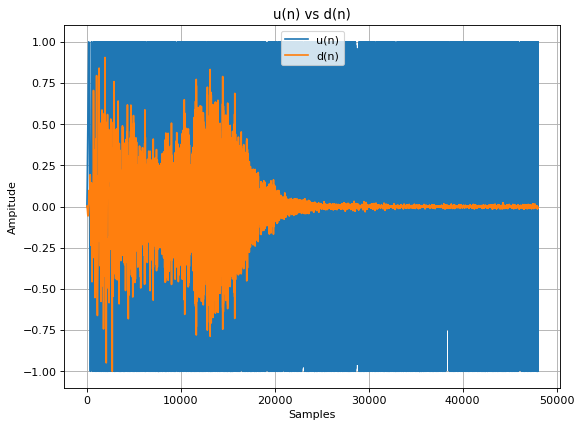

Starting order  500
Starting order  1000
Starting order  1500
Starting order  2000
Starting order  2500
Starting order  3000
Starting order  3500
Starting order  4000
Starting order  4500
Starting order  5000


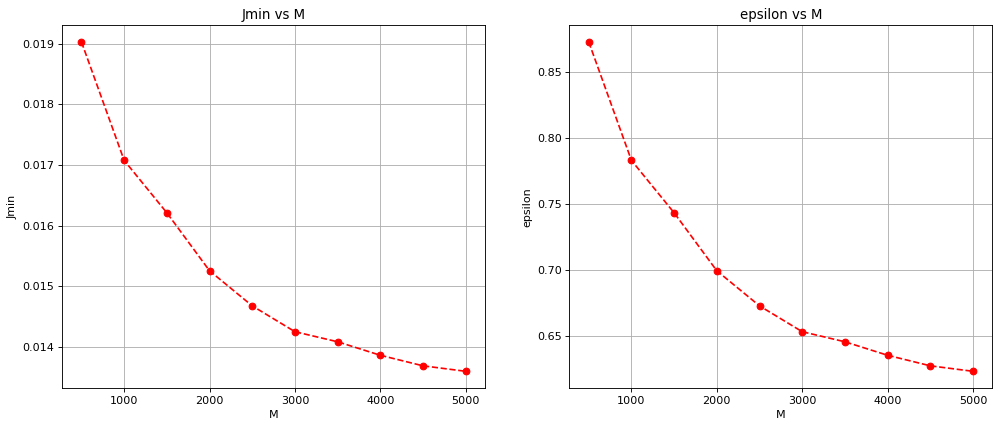

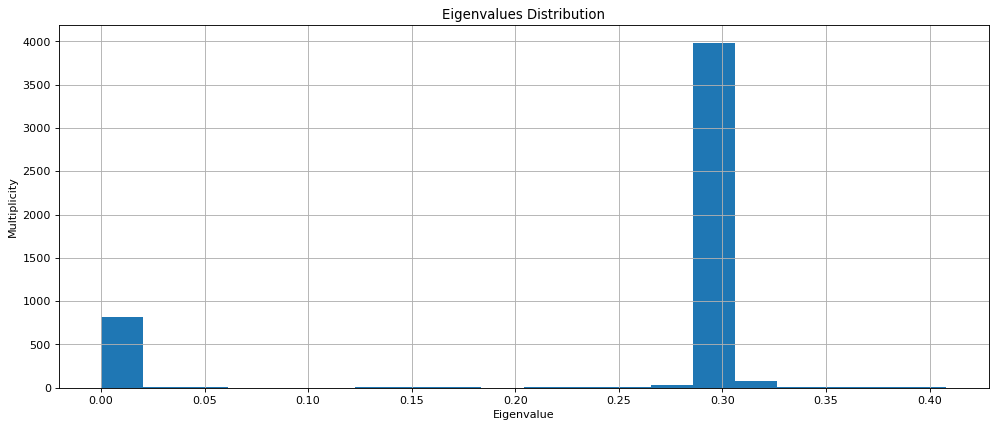

In [27]:
data = lineal_sweep
desired = lineal_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s, M_s = search_opt_M(u_n, d_n, m_jump=500, th=0.01)
plot_Jmin_and_eps(M_s, Jmin_s, eps_s)
m_opt = M_s[-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [28]:
IPython.display.Audio(filtered,rate=fs)

## Exp Signal

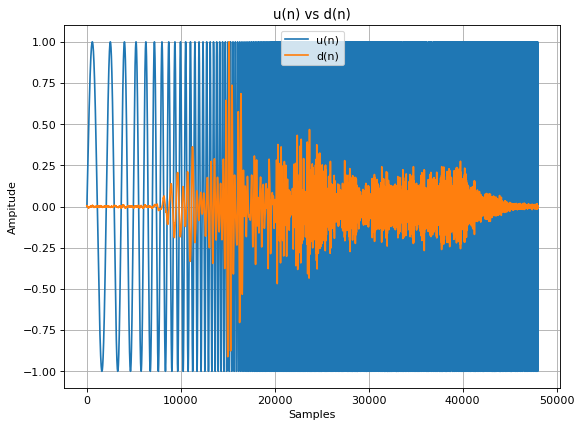

Starting order  500
Starting order  1000
Starting order  1500
Starting order  2000
Starting order  2500
Starting order  3000


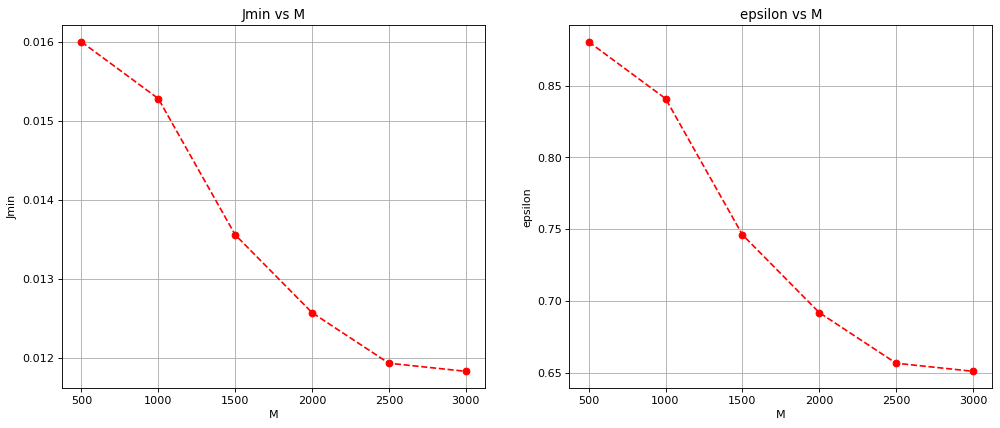

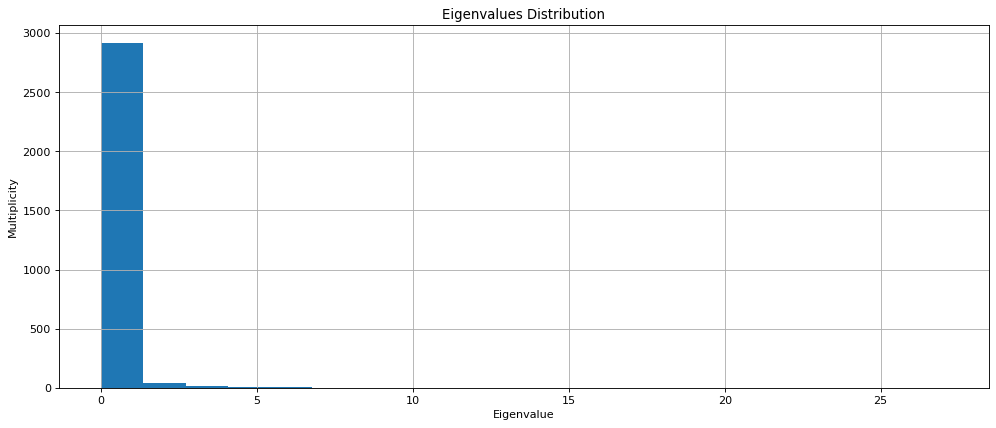

In [29]:
data = exp_sweep
desired = exp_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s, M_s = search_opt_M(u_n, d_n, m_jump=500, th=0.01)
plot_Jmin_and_eps(M_s, Jmin_s, eps_s)
m_opt = M_s[-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [30]:
IPython.display.Audio(filtered,rate=fs)

## Noise Signal

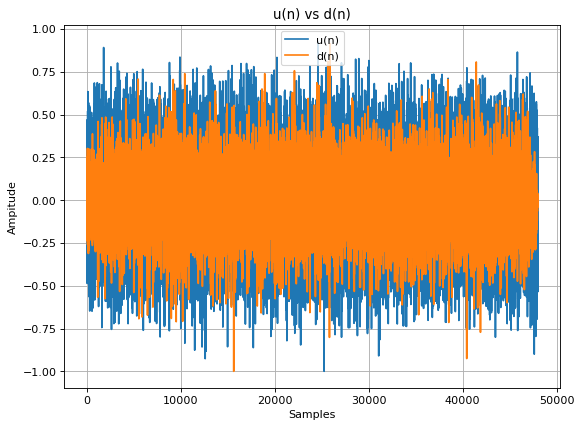

Starting order  500
Starting order  1000
Starting order  1500
Starting order  2000
Starting order  2500
Starting order  3000


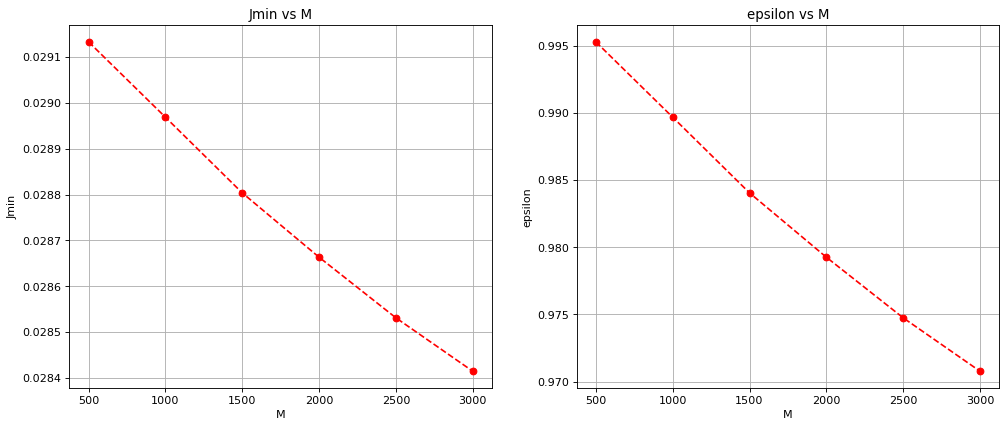

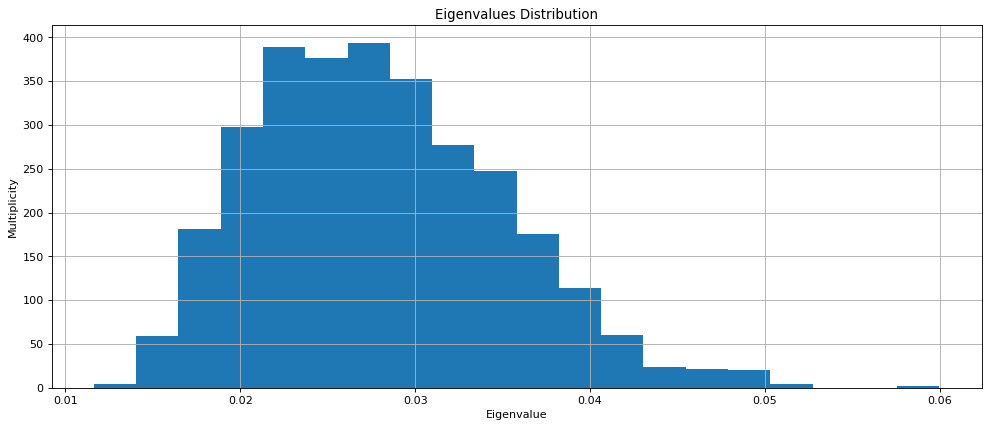

In [34]:
data = noise
desired = noise_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s, M_s = search_opt_M(u_n, d_n, m_jump=500, th=0.0045)
plot_Jmin_and_eps(M_s, Jmin_s, eps_s)
m_opt = M_s[-1]
eps_opt = eps_s[-1]
ev, _ = get_eigenvalues(u_n, m_opt)
plot_ev(ev)

In [32]:
IPython.display.Audio(filtered,rate=fs)

# 3 Realizar un contraste cualitativo y cuantitativo entre los filtros óptimos de los diferentes casos.

terminar

# 4 A partir del contraste del punto anterior, seleccionar el filtro que mejor representa la respuesta de la habitación. Filtrar un segmento de audio con este segmento. Escucharlo con auriculares y compararlo con la señal escuchada en la habitación.

terminar